In [45]:
%matplotlib inline

In [46]:
from dipy.reconst.dti import fractional_anisotropy, color_fa
from argparse import ArgumentParser
from scipy import ndimage
import os
import re
import numpy as np
import nibabel as nb
import sys
import matplotlib

#matplotlib.use('Agg')  # very important above pyplot import
import matplotlib.pyplot as plt

In [47]:
cd

/root


In [48]:
ls

Aut1367.nii               final.ipynb
Final Downsampled.ipynb   index.html
Final Downsampled2.ipynb  miniTIFF/
Final Notebook.ipynb      pipeline.ipynb
TIFF_stack/               prototype.ipynb
Untitled-Copy1.ipynb      result/
Untitled.ipynb            sample0.tiff
bigtiff/                  sample1.tiff
downsampled/              sample2.tiff
downsampled.nii           sample3.tiff
downsampled0.tiff         seelviz/
downsampled1.tiff         tensor_rgb_upper.nii.gz
downsampled2.tiff         tmp/
downsampled3.tiff         v100_ch0_tensorfsl_dogsig1_gausig2.3.nii


In [49]:
cd result

/root/result


In [55]:
ls

tensor_rgb_upper.nii.gz
v100_ch0_tensordtk_dogsig1_gausig2.3_tensor.nii
v100_ch0_tensorfsl_dogsig1_gausig2.3.nii


In [56]:
from dipy.reconst.dti import from_lower_triangular


In [57]:
ls

tensor_rgb_upper.nii.gz
v100_ch0_tensordtk_dogsig1_gausig2.3_tensor.nii
v100_ch0_tensorfsl_dogsig1_gausig2.3.nii


In [58]:
img = nb.load('v100_ch0_tensorfsl_dogsig1_gausig2.3.nii')

In [59]:
data = img.get_data()


In [60]:
output = from_lower_triangular(data)

In [61]:
output_ds = output[4250:4300, 250:300, :, :, :]

In [62]:

print output.shape
print output_ds.shape

(92, 60, 6, 3, 3)
(0, 0, 6, 3, 3)


In [63]:
FA = fractional_anisotropy(output)

In [64]:
FA = np.clip(FA, 0, 1)

In [65]:
FA[np.isnan(FA)] = 0

In [66]:

print FA.shape

(92, 60, 6, 3)


In [67]:

from dipy.reconst.dti import decompose_tensor

In [68]:
evalues, evectors = decompose_tensor(output)

In [69]:
print evectors[..., 0, 0].shape
print evectors.shape[-2:]

(92, 60, 6)
(3, 3)


In [70]:
print FA[:, :, :, 0].shape

(92, 60, 6)


In [71]:
RGB = color_fa(FA[:, :, :, 0], evectors)

In [72]:
nb.save(nb.Nifti1Image(np.array(255 * RGB, 'uint8'), img.get_affine()), 'tensor_rgb_upper.nii.gz')


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [73]:
def plot_rgb(im):
    plt.rcParams.update({'axes.labelsize': 'x-large',
                         'axes.titlesize': 'x-large'})

    if im.shape == (182, 218, 182):
        x = [78, 90, 100]
        y = [82, 107, 142]
        z = [88, 103, 107]
    else:
        shap = im.shape
        x = [int(shap[0]*0.35), int(shap[0]*0.51), int(shap[0]*0.65)]
        y = [int(shap[1]*0.35), int(shap[1]*0.51), int(shap[1]*0.65)]
        z = [int(shap[2]*0.35), int(shap[2]*0.51), int(shap[2]*0.65)]
    coords = (x, y, z)

    labs = ['Sagittal Slice (YZ fixed)',
            'Coronal Slice (XZ fixed)',
            'Axial Slice (XY fixed)']
    var = ['X', 'Y', 'Z']

    idx = 0
    for i, coord in enumerate(coords):
        for pos in coord:
            idx += 1
            ax = plt.subplot(3, 3, idx)
            ax.set_title(var[i] + " = " + str(pos))
            if i == 0:
                image = ndimage.rotate(im[pos, :, :], 90)
            elif i == 1:
                image = ndimage.rotate(im[:, pos, :], 90)
            else:
                image = im[:, :, pos]

            if idx % 3 == 1:
                ax.set_ylabel(labs[i])
                ax.yaxis.set_ticks([0, image.shape[0]/2, image.shape[0] - 1])
                ax.xaxis.set_ticks([0, image.shape[1]/2, image.shape[1] - 1])

            plt.imshow(image)

    fig = plt.gcf()
    fig.set_size_inches(12.5, 10.5, forward=True)
    return fig

In [74]:
affine = img.get_affine()

fa = nb.Nifti1Image(np.array(255 * RGB, 'uint8'), affine)
im = fa.get_data()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [75]:
print np.asarray(fa)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (92, 60, 6, 3)
affine: 
[[ 1.  0.  0.  1.]
 [ 0.  1.  0.  1.]
 [ 0.  0.  1.  1.]
 [ 0.  0.  0.  1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [ 4 92 60  6  3  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [ 1.  1.  1.  1.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : 
aux_file        : 
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
qu

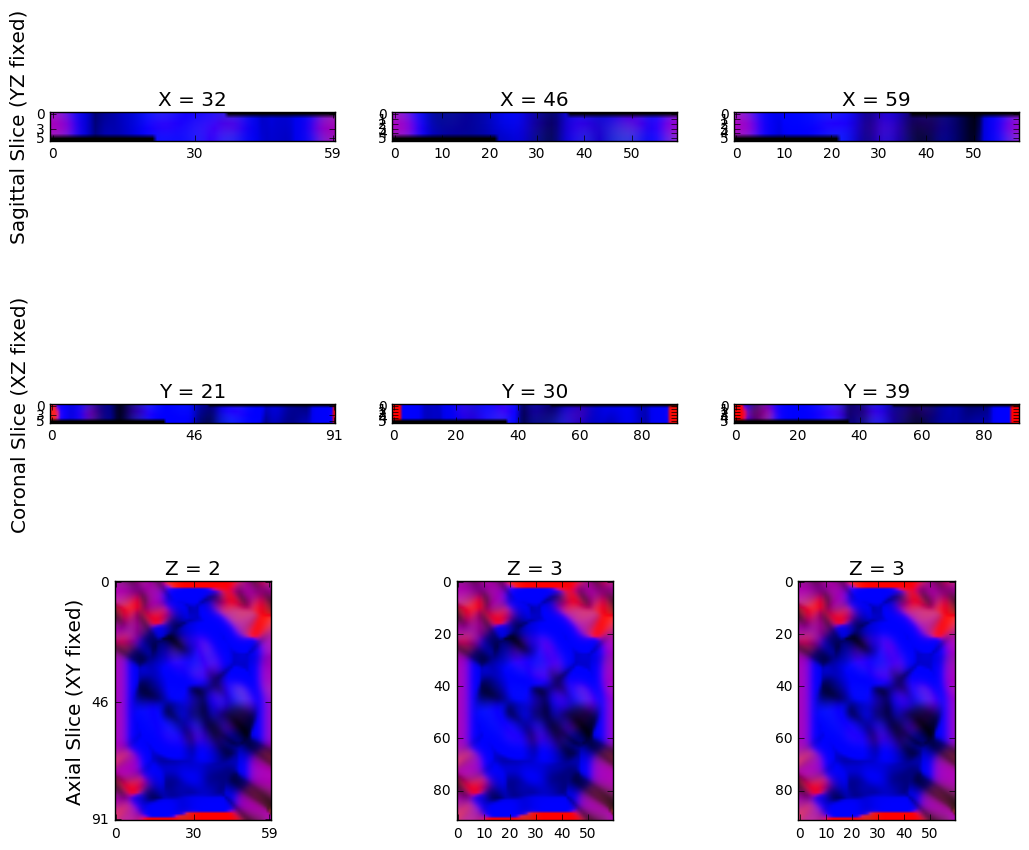

In [76]:
fig = plot_rgb(im)

In [77]:
import os

In [78]:
ls

tensor_rgb_upper.nii.gz
v100_ch0_tensordtk_dogsig1_gausig2.3_tensor.nii
v100_ch0_tensorfsl_dogsig1_gausig2.3.nii


In [80]:
cd ..

/root/result


In [82]:
ls

dogsig1_gausig2.3/  v100_ch0_ga_dogsig1.nii  v100_ch0_gv_dogsig1.nii


In [83]:
cd ..

/root


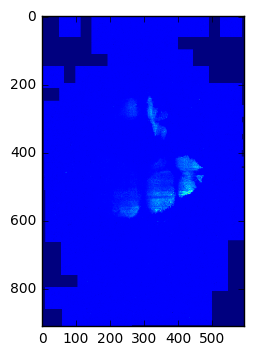

In [84]:
from PIL import Image
im = plt.imread('sample3.tiff') 
plt.imshow(im)